# Analysis : Indicators of success
___
```
This is an analysis done on the electoral data of only 2014 to 2019, to chart and discover trends that correlate with candidate success, as measured by Vote_Share_Percent, Margin_Percent, and by Deposit_Lost.
We are also interested in seeing if the Gender and the caste of a candidate has an impact on thier success, since this would imply bias in the elections.
```

___

## Data Preparation
1. Filtered data for only instances above 2014
2. Split into categorical and numerical columns
3. Added a success metric: wins

In [1]:
import pandas as pd
import numpy as np
from dython.nominal import associations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "../assets/data/cleaned_data.csv"
df = pd.read_csv(data_path)
df = df[df["Year"] > 2014]
df.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
categorical_columns = ['Sex', 'Party', 'Candidate_Type', 'Constituency_Type', 'Party_Type_TCPD', 'Same_Constituency','Same_Party',
                       'Turncoat', 'Incumbent', 'Recontest', 'MyNeta_education',
                       'TCPD_Prof_Main', 'Deposit_Lost', 'last_poll']

numerical_columns = ['Electors', 'N_Cand', 'Turnout_Percentage',
                     'Vote_Share_Percentage', 'Margin_Percentage', 'ENOP','No_Terms', 'Contested', 'Win']
import pandas as pd

df['Win'] = df['No_Terms'] * 100 / df['Contested']


___ 
## Exploratory Data Analysis
- Thiel-U  Coefficient was used to visualize relationships between the variables in the dataset. This bins the numerical columns to calculate conditional entropy.

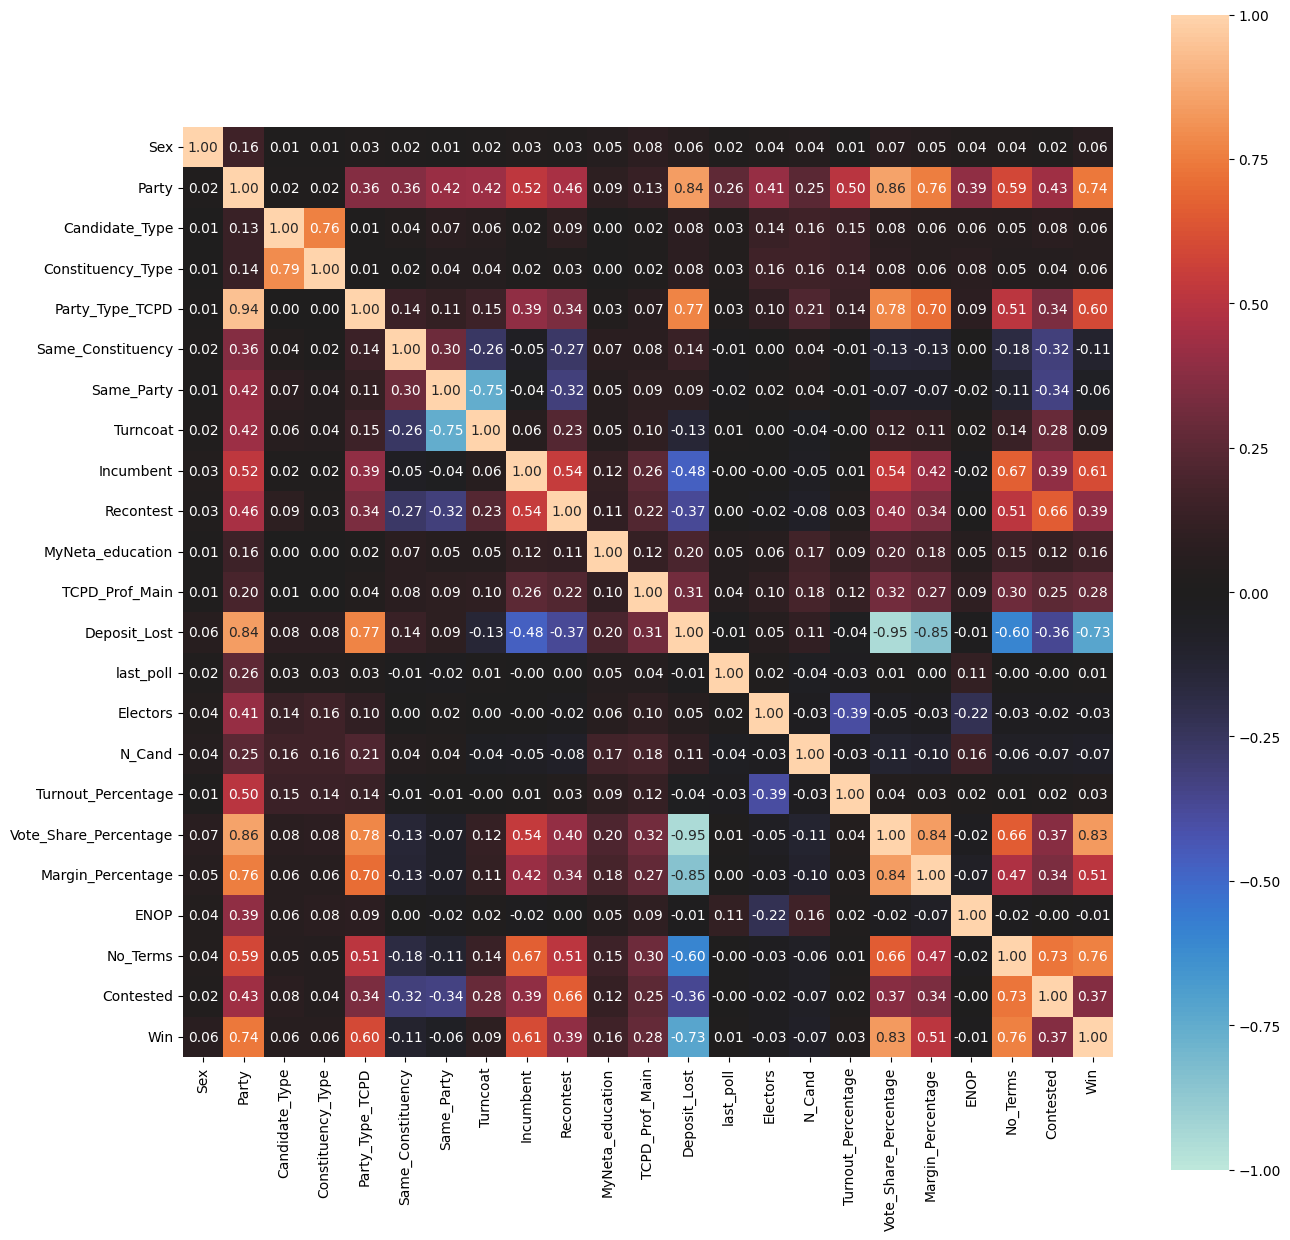

In [4]:
result = associations(df[categorical_columns + numerical_columns],nom_nom_assoc='theil', figsize=(15, 15))

---
### Here are some interesting insights based on the above data: 
- Sex, and Candidate_Type, overall have low correlaion with most of the fields, speficially with the vote_share_percent and with Win, indicating low bias in the electoral process.

- The greatest indicators of success, as measusred by "win" are interestingly party_type, recontest, the profession, and contested and incumbency.

- Turncoat candidates have little to do with wether they win or not.

- We proceed to do an analysis of the above factors.

___

## What demographic wins the most elections?

- Since we found both profession and Party to affect win percentages strongly, we look into these factors and chart them out to properly understand their effects. 

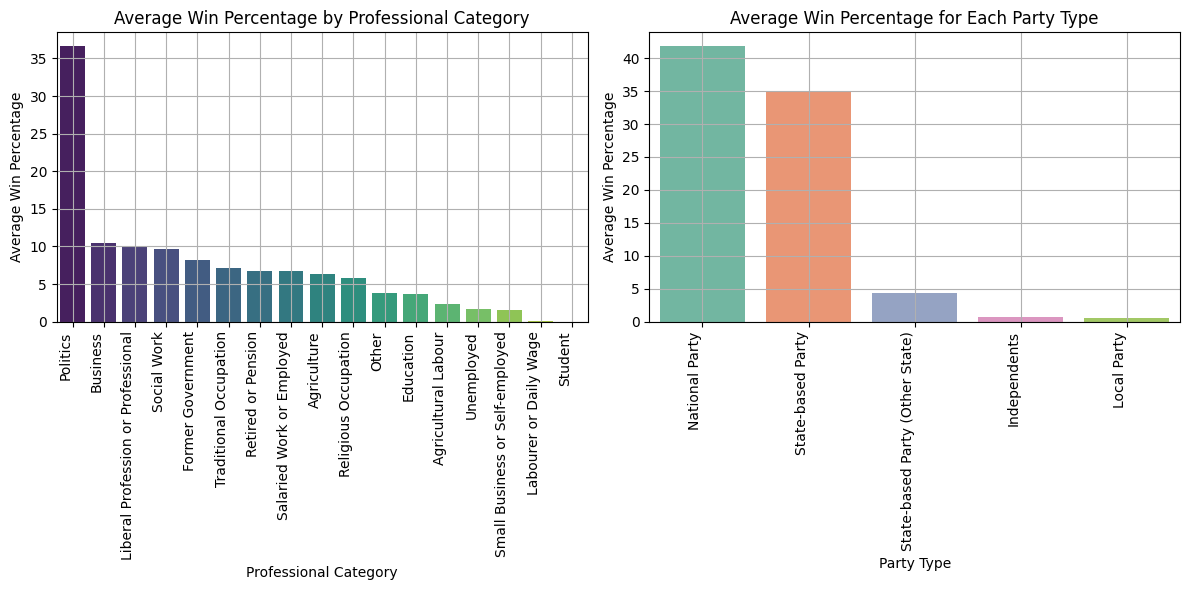

In [5]:
prof_win_vote_share_df = df[['Win', 'Vote_Share_Percentage', 'TCPD_Prof_Main']]
averages_by_prof = prof_win_vote_share_df.groupby('TCPD_Prof_Main').mean()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
averages_by_prof = averages_by_prof.sort_values(by='Win', ascending=False)
sns.barplot(x=averages_by_prof.index, y='Win', data=averages_by_prof, palette='viridis')
plt.xlabel('Professional Category')
plt.ylabel('Average Win Percentage')
plt.title('Average Win Percentage by Professional Category')
plt.xticks(rotation=90, ha='right')
plt.grid(True)


party_type_df = df[['Party_Type_TCPD', 'Win', 'Vote_Share_Percentage']]
average_data = party_type_df.groupby('Party_Type_TCPD').mean().reset_index()
plt.subplot(1, 2, 2)  # Second subplot
average_data = average_data.sort_values(by='Win', ascending=False)
sns.barplot(x='Party_Type_TCPD', y='Win', data=average_data, palette='Set2')
plt.xlabel('Party Type')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Average Win Percentage')
plt.title('Average Win Percentage for Each Party Type')
plt.grid(True)

plt.tight_layout()
plt.show()

### Inferences:
- It is evident from the above graphs that, quite intuitively, candidates who are professionally politicians will win far more than other professions. However, whats interesting about the above graph is that businessmen, Social workers, or people with liberal professions are the next professions that are most likely to win an election (Only interpreting data, no inference drawn here).

- And on the other graphs, it looks like National and Same-State parties are generally the only parties that win, with there being some chance of state parties from other states winning.

___

## Recontestants and Incumbents: Does Persistance help with winning elections?  
- Here we use box plots to look at interquartile information of how the above factors effect the chances of a candidate winning

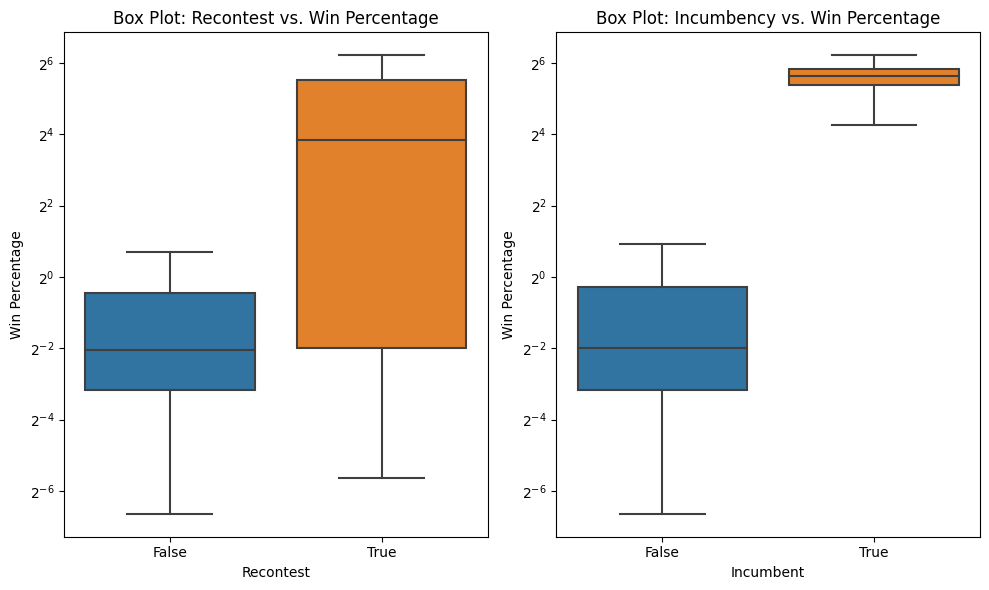

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


columns_of_interest = ["Recontest", "Incumbent", "Vote_Share_Percentage"]


selected_df = df[columns_of_interest]


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Recontest', y='Vote_Share_Percentage', data=selected_df, showfliers=False)
plt.xlabel('Recontest')
plt.ylabel('Win Percentage')
plt.yscale('log', base=2)
plt.title('Box Plot: Recontest vs. Win Percentage')

plt.subplot(1, 2, 2)
sns.boxplot(x='Incumbent', y='Vote_Share_Percentage', data=selected_df, showfliers=False)
plt.xlabel('Incumbent')
plt.ylabel('Win Percentage')
plt.yscale('log', base=2)
plt.title('Box Plot: Incumbency vs. Win Percentage')


plt.tight_layout()


plt.show()


### Inferences:
- We can notice from both these graphs that, simply put, Recontesting candidates have a higher chance of winning.
- A far stronger indicator in Incumbency: candidates that are already sitting in the party have a far higher chance of winning. Notice that the scale is logarithmic. Even the 25th percentile of Incumbent candidates is much higher than the 75th percentile of non Incumbent candidates.

___
## Political Carrers: How long should you compete?
- Here we answer an interesting question: does the number of times you contest in an electoral process have anything to do with wether you win?

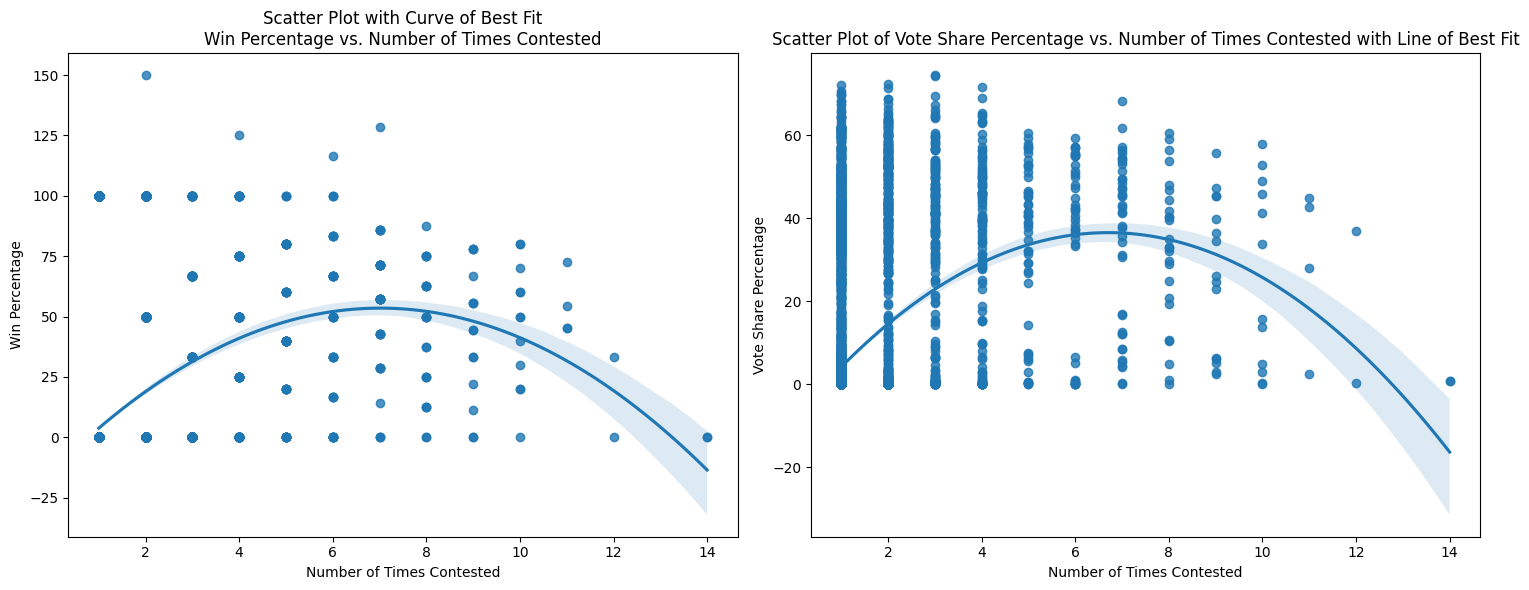

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


sns.regplot(x='Contested', y='Win', data=df, order=2, ax=axes[0])  # Use order=2 for a quadratic curve
axes[0].set_xlabel('Number of Times Contested')
axes[0].set_ylabel('Win Percentage')
axes[0].set_title('Scatter Plot with Curve of Best Fit\nWin Percentage vs. Number of Times Contested')


sns.regplot(x='Contested', y='Vote_Share_Percentage', data=df, order=2, ax=axes[1])  # Use order=1 for linear regression
axes[1].set_xlabel('Number of Times Contested')
axes[1].set_ylabel('Vote Share Percentage')
axes[1].set_title('Scatter Plot of Vote Share Percentage vs. Number of Times Contested with Line of Best Fit')


plt.tight_layout()
plt.show()


### Inferences:
- We see an interesting pattern emerge from these graphs: The success of a candidate steadily increases until they have contested exactly 7 times, before again reducing, and steeply falling to 0! 

- To answer the question: contest 7 times.

___
## Combining Factors: A deeper insight
- This is some extra exploration to see understand the relationship between incumbency, party type and winning. 

<Figure size 1000x600 with 0 Axes>

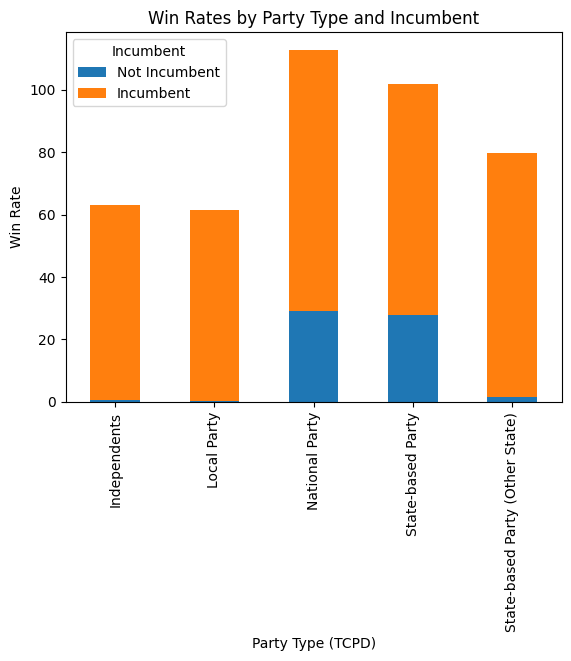

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
grouped_data = df.groupby(['Party_Type_TCPD', 'Incumbent'])['Win'].mean().unstack()
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Party Type (TCPD)')
plt.ylabel('Win Rate')
plt.title('Win Rates by Party Type and Incumbent')
plt.legend(title='Incumbent', labels=['Not Incumbent', 'Incumbent'])
plt.show()

### Inferences:
- We make one key observation: If you are a non incumbent candidate, you stand close to 0 chance of winning if you are not a part of a national or a native state party.
___